# Geospatial Data Rainfall Pattern Analysis

# AI/ML for Geodata Analysis  - Indian Institute of Remote Sensing (IIRS)

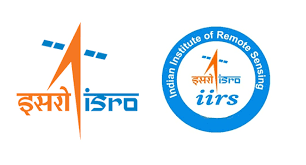

## Project Title: Geospatial Data Analysis for Rainfall Patterns
## Author: HARIKARAN M
##  Skills and Implemented Frameworks: Python, Jupyter Notebook, Geospatial & AI & ML Knowledge, Pandas, NumPy, Seaborn, scikit-learn, Plotly, GeoPandas, and more.
##  Description: This project analyzes rainfall patterns in India using geospatial data. It involves: Importing necessary libraries,Loading and preprocessing data, Feature engineering, Exploratory data analysis, Machine learning modeling, Geospatial visualization. The primary objective is to understand rainfall distribution and trends across different regions in August 2023.



### Steps to follow the complete project 

### [1] Import necessary libraries: 
##### The script starts by importing necessary libraries such as pandas, numpy, seaborn, sklearn, plotly, and geopandas.

### [2] Load the dataset: 
##### The dataset containing Indian Rainfall data is loaded into a pandas DataFrame.

###  [3] Data Preprocessing: 
##### The script checks for missing values, duplicates, and data types in the dataset.

###  [4] Feature Engineering:
##### A new column 'total_rainfall' is created that sums up the daily rainfall measurements.

###  [5] Exploratory Data Analysis (EDA): 
##### The script performs EDA by aggregating total_rainfall by month, state, and district. It also computes a correlation matrix for the daily rainfall measurements.

###  [6] Prepare data for machine learning:
##### The script prepares data for machine learning by filtering data for a specific district, creating a new feature, and splitting the data into training and test sets.

###  [7] Apply machine learning models: 
##### The script applies several machine learning models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting) to the data and calculates the root mean square error (RMSE) for each model.

###  [8] Geospatial Analysis: 
##### The script loads a shapefile for Indian boundaries, merges it with the rainfall data, and creates a choropleth map using plotly to visualize district-wise rainfall in India.

In [4]:
# Instal geopandas libraries
!pip install plotly geopandas


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


### Step 1: Load the Geospatial Dataset


In [6]:
Geospatial_Data = pd.read_excel("Geospatial Data Analysis -Indian Rainfall Dataset District.xlsx")
Geospatial_Data.head()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,Andaman & Nicobar,Nicobars,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Andaman & Nicobar,North And Middle Andaman,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,Andaman & Nicobar,South Andamans,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,Andhra Pradesh,Anantapur,1,0.379965,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.205834,0.671002,0.028994,0.0,0.0,0.0
4,Andhra Pradesh,Chittoor,1,14.144900,0.857263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [8]:
Geospatial_Data.tail()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
8785,West Bengal,Murshidabad,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.006543,0.485502,0.000000,0.0,0.0,0.0
8786,West Bengal,Nadia,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.019657,0.002422,0.0,0.0,0.0
8787,West Bengal,Paschim Bardhaman,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000958,0.0,0.0,0.0,0.000000,0.319227,0.001392,0.0,0.0,0.0
8788,West Bengal,Purba Bardhaman,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.037060,0.000000,0.0,0.0,0.0
8789,West Bengal,Purulia,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,0.0,0.0,0.0,0.000000,0.113793,0.004079,0.0,0.0,0.0


In [9]:
Geospatial_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     8790 non-null   object 
 1   district  8790 non-null   object 
 2   month     8790 non-null   int64  
 3   1st       8790 non-null   float64
 4   2nd       8790 non-null   float64
 5   3rd       8790 non-null   float64
 6   4th       8790 non-null   float64
 7   5th       8790 non-null   float64
 8   6th       8790 non-null   float64
 9   7th       8790 non-null   float64
 10  8th       8790 non-null   float64
 11  9th       8790 non-null   float64
 12  10th      8790 non-null   float64
 13  11th      8790 non-null   float64
 14  12th      8790 non-null   float64
 15  13th      8790 non-null   float64
 16  14th      8790 non-null   float64
 17  15th      8790 non-null   float64
 18  16th      8790 non-null   float64
 19  17th      8790 non-null   float64
 20  18th      8790 non-null   floa

In [10]:
Geospatial_Data.describe()

,month,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,6.502162,3.493094,3.210606,2.915560,3.909056,4.256830,4.754248,3.174247,3.746569,4.176870,...,3.030564,3.708869,3.457348,3.230453,2.854965,3.076293,2.192825,2.437567,1.938469,0.635373
std,3.452281,9.824910,9.245431,7.179966,9.192568,10.675278,12.634238,8.454718,10.272592,11.560505,...,7.836818,10.606420,8.488457,8.516695,8.417082,8.510549,7.613134,8.559438,6.673454,3.192389
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000107,...,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.754773,2.130985,1.721510,3.528917,3.317140,3.309595,1.912470,2.098642,2.202985,...,2.682410,1.997115,2.594315,1.886385,1.439935,1.916800,0.527392,0.355160,0.007036,0.000000
max,12.000000,218.306000,321.706000,83.310000,183.320000,200.507000,221.427000,125.052000,160.666000,149.033000,...,133.393000,195.206000,134.550000,113.798000,295.649000,124.925000,167.224000,182.680000,86.015900,91.676100


## Step 2: Data Preprocessing


In [11]:
# Step 2: Data Preprocessing
# 2.1: Check for missing values
missing_values = Geospatial_Data.isnull().sum()
print(f"Missing_Values",missing_values)

Missing_Values state       0
district    0
month       0
1st         0
2nd         0
3rd         0
4th         0
5th         0
6th         0
7th         0
8th         0
9th         0
10th        0
11th        0
12th        0
13th        0
14th        0
15th        0
16th        0
17th        0
18th        0
19th        0
20th        0
21st        0
22nd        0
23rd        0
24th        0
25th        0
26th        0
27th        0
28th        0
29th        0
30th        0
31st        0
dtype: int64


In [12]:
# 2.2: Check for duplicates
duplicates = Geospatial_Data.duplicated().sum()
print(f'Duplicates', duplicates)

Duplicates 0


In [22]:
# 2.3: Check data types
Data_type = Geospatial_Data.dtypes
print(f"DATA_Type's", Data_type)


DATA_Type's state        object
district     object
month         int64
1st         float64
2nd         float64
3rd         float64
4th         float64
5th         float64
6th         float64
7th         float64
8th         float64
9th         float64
10th        float64
11th        float64
12th        float64
13th        float64
14th        float64
15th        float64
16th        float64
17th        float64
18th        float64
19th        float64
20th        float64
21st        float64
22nd        float64
23rd        float64
24th        float64
25th        float64
26th        float64
27th        float64
28th        float64
29th        float64
30th        float64
31st        float64
dtype: object


## Step 3: Create a new column 'total_rainfall' that sums up the daily rainfall measurements

In [13]:
# Step 3: Create a new column 'total_rainfall' that sums up the daily rainfall measurements
Geospatial_Data["Total_Rainfall"] = Geospatial_Data.iloc[ : , 3: ].sum(axis =1 )
print(Geospatial_Data.head())

               state                  district  month        1st       2nd  \
0  Andaman & Nicobar                  Nicobars      1   0.000000  0.000000   
1  Andaman & Nicobar  North And Middle Andaman      1   0.000000  0.000000   
2  Andaman & Nicobar            South Andamans      1   0.000000  0.000000   
3     Andhra Pradesh                 Anantapur      1   0.379965  0.000000   
4     Andhra Pradesh                  Chittoor      1  14.144900  0.857263   

   3rd  4th  5th  6th  7th  ...  23rd      24th      25th      26th      27th  \
0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
1  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
2  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.000000  0.000000   
3  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.000000  0.000000  0.205834  0.671002   
4  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.615237  0.925098  0.507623  0.424843   

       28th  29th  30th  31st  Total_Rainfal

## Step 4: Perform Exploratory Data Analysis


In [14]:
# Step 4: Perform exploratory data analysis
# 4.1: Aggregate Averge_rainfall by month

monthly_Avg_rainfall = Geospatial_Data.groupby("month")["Total_Rainfall"].mean()
print(f'Monthly_Average_Rainfall', monthly_Avg_rainfall)

Monthly_Average_Rainfall month
1      40.221399
2      24.508518
3      13.172579
4      67.042649
5     121.877703
6     209.271046
7     306.074377
8     261.916848
9     175.163118
10     94.044492
11     12.293226
12     11.395267
Name: Total_Rainfall, dtype: float64


In [15]:
# 4.2: Aggregate Averge_rainfall by month
monthly_total_rainfall = Geospatial_Data.groupby("month")["Total_Rainfall"].sum().round(2)
print(f'Mothly_total_rainfall',monthly_total_rainfall)

Mothly_total_rainfall month
1      29442.06
2      17940.24
3       9642.33
4      49075.22
5      89214.48
6     153186.41
7     224046.44
8     192246.97
9     128394.57
10     68934.61
11      9010.93
12      8352.73
Name: Total_Rainfall, dtype: float64


In [40]:
# 4.2: Aggregate total_rainfall by state
state_wise_rainfall= Geospatial_Data.groupby("state")["Total_Rainfall"].sum().round(2).sort_values( ascending = False)
print(f'State wise total Rainfall', state_wise_rainfall)

State wise total Rainfall state
Assam                   318461.43
Arunachal Pradesh       263863.38
Madhya Pradesh          252219.82
Uttar Pradesh           249063.07
Meghalaya               210053.63
Maharashtra             209379.58
Telangana               175791.36
Karnataka               165182.63
Odisha                  164903.15
West Bengal             152732.55
Bihar                   150994.53
Chhattisgarh            147446.09
Gujarat                 143227.78
Kerala                  137433.34
Tamil Nadu              135557.83
Rajasthan                99938.09
Jammu & Kashmir          93132.63
Manipur                  92146.44
Jharkhand                90423.40
Uttarakhand              71224.33
Haryana                  63517.50
Nagaland                 62065.86
Punjab                   61248.04
Tripura                  59732.69
Delhi                    58521.53
Mizoram                  54610.33
Himachal Pradesh         52454.20
Andhra Pradesh           50405.71
Sikkim          

In [16]:
# 4.3: Aggregate total_rainfall by district
district_rainfall = Geospatial_Data.groupby('district')['Total_Rainfall'].sum().round(2).sort_values(ascending = False)
print( f'Total Rainfall by District', '\n' , district_rainfall)

Total Rainfall by District 
 district
South West Khasi Hills      10425.93
South Garo Hills             7977.12
East Khasi Hills             5878.18
West Khasi Hills             5805.08
East Garo Hills              5342.60
                              ...   
Lakshadweep District            0.00
Nicobar                         0.00
Nicobars                        0.00
North & Middle Andaman          0.00
North And Middle Andaman        0.00
Name: Total_Rainfall, Length: 854, dtype: float64


### 4.4: Coorelation Analysis
### [By analyzing the correlation matrix,gain insights into how different days’rainfall measurements are related, which can inform further analysis or modeling]

In [17]:
# 
# Compute the correlation matrix for the daily rainfall measurements & Display the correlation matrix

correlation_matrix = Geospatial_Data.iloc[ : , 3: -1].corr()
correlation_matrix



,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
1st,1.000000,0.565173,0.295780,0.360499,0.378970,0.252370,0.276872,0.259248,0.177829,0.185133,...,0.159409,0.124475,0.294409,0.210690,0.174365,0.307688,0.240807,0.227789,0.167026,0.254140
2nd,0.565173,1.000000,0.410402,0.424882,0.471213,0.260307,0.299530,0.262653,0.209936,0.180569,...,0.140512,0.186243,0.270755,0.197368,0.187641,0.298888,0.259357,0.164642,0.217491,0.245121
3rd,0.295780,0.410402,1.000000,0.472555,0.340991,0.319808,0.347681,0.352328,0.263447,0.271901,...,0.171346,0.257576,0.299058,0.263017,0.263393,0.256298,0.262252,0.206229,0.164805,0.092831
4th,0.360499,0.424882,0.472555,1.000000,0.531934,0.358152,0.315584,0.295343,0.281989,0.292936,...,0.127141,0.186537,0.270524,0.223696,0.233511,0.249002,0.335772,0.237641,0.229859,0.139341
5th,0.378970,0.471213,0.340991,0.531934,1.000000,0.455780,0.455093,0.424239,0.347116,0.309404,...,0.087052,0.162649,0.260012,0.151126,0.114431,0.093796,0.152084,0.081319,0.134628,0.087025
6th,0.252370,0.260307,0.319808,0.358152,0.455780,1.000000,0.594504,0.512158,0.358285,0.393341,...,0.084321,0.131621,0.194836,0.162730,0.080507,0.142845,0.220706,0.163572,0.167925,0.036758
7th,0.276872,0.299530,0.347681,0.315584,0.455093,0.594504,1.000000,0.564452,0.431535,0.444288,...,0.060384,0.118272,0.206942,0.134286,0.054346,0.103739,0.138162,0.114029,0.101183,0.059530
8th,0.259248,0.262653,0.352328,0.295343,0.424239,0.512158,0.564452,1.000000,0.592129,0.486371,...,0.101851,0.186029,0.246796,0.164556,0.121147,0.153819,0.152393,0.123102,0.091534,0.067812
9th,0.177829,0.209936,0.263447,0.281989,0.347116,0.358285,0.431535,0.592129,1.000000,0.598798,...,0.058855,0.181679,0.223532,0.129214,0.100776,0.127995,0.189082,0.191757,0.102781,0.037672
10th,0.185133,0.180569,0.271901,0.292936,0.309404,0.393341,0.444288,0.486371,0.598798,1.000000,...,0.084065,0.243437,0.192403,0.143574,0.082540,0.112535,0.112007,0.105450,0.048140,0.019632


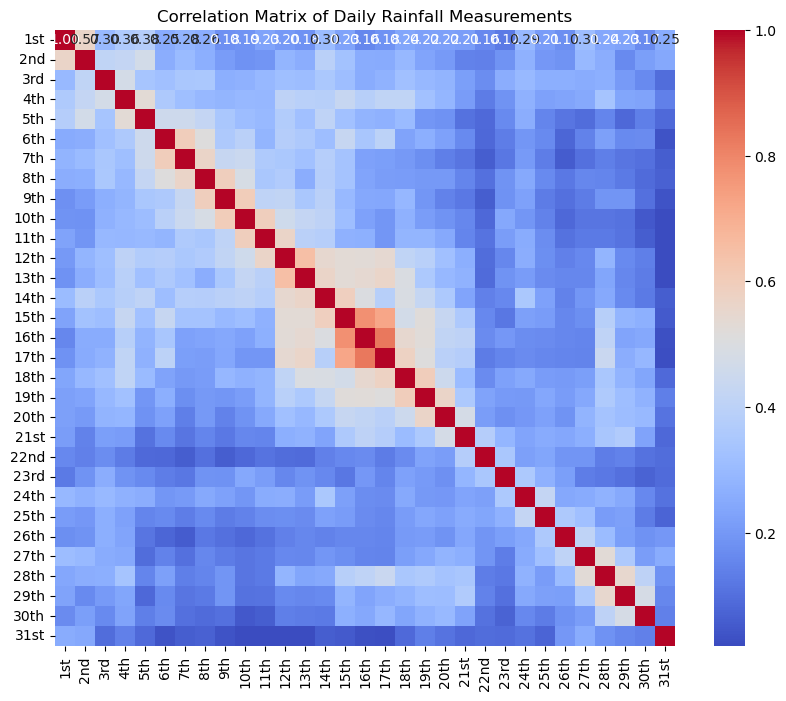

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Rainfall Measurements')
plt.show()

# Step 5: Prepare Data for Machine Learning

In [19]:
# Filter data for 'South West Khasi Hills' district, becasue its top of the list 

district_data = Geospatial_Data[Geospatial_Data['district'] == 'South West Khasi Hills']

# Create a new feature: average historical rainfall for the month in the district

district_data["Historical_Avg_Rainfall"]= district_data.groupby("month")["Total_Rainfall"].transform('mean')

# Features and target variable

X = district_data[["month", "Historical_Avg_Rainfall"]]
y = district_data["Total_Rainfall"]

# Split the data into training set and test set

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)


C:\Users\harikaran\AppData\Local\Temp\ipykernel_1632\2660240710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_data["Historical_Avg_Rainfall"]= district_data.groupby("month")["Total_Rainfall"].transform('mean')


## Step 6: Apply machine learning models


In [20]:
# 6.1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_rsme = np.sqrt(mean_squared_error ( y_test, lr_model.predict(X_test)))


In [21]:
# 6.2: Decision Tree
dt_model = DecisionTreeRegressor(random_state =42)
dt_model.fit(X_train, y_train)
dt_rsme = np.sqrt(mean_squared_error( y_test, dt_model.predict(X_test)))

In [22]:
# 6.3: Random Forest
rf_model = RandomForestRegressor (random_state =42)
rf_model.fit(X_train, y_train)
rf_rsme = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

In [23]:
# 6.4: Gradient Boosting
gb_model = GradientBoostingRegressor(random_state =42)
gb_model.fit(X_train, y_train)
gb_rsme = np.sqrt(mean_squared_error(y_test, gb_model.predict(X_test)))


In [24]:
# Compile results

Results = [("Linear Regression: " ,lr_rsme ), (" Decision Tree : " , dt_rsme) , ("Random Forest : " , rf_rsme) , ("Gradient Boosting: " , gb_rsme) ]
Results

[('Linear Regression: ', 8.573040307690628e-14),
 (' Decision Tree : ', 58.07132424394945),
 ('Random Forest : ', 178.02271919818298),
 ('Gradient Boosting: ', 52.59653000247973)]

## Step 7: Create a representation of the GeoDataFrame for the month of August

In [25]:
# Filter data for the month of August
August_data = Geospatial_Data[Geospatial_Data["month"]==8]

In [26]:
india_geo = gpd.read_file('INDIA_DISTRICTS.geojson')

# Display the GeoDataFrame
india_geo

,dtname,stname,stcode11,dtcode11,year_stat,SHAPE_Length,SHAPE_Area,OBJECTID,test,Dist_LGD,State_LGD,geometry
0,Morbi,GUJARAT,24,727,update2014,5.983342e+05,5.892260e+09,1,None,673,24,"POLYGON ((71.27029 23.15576, 71.26874 23.15591..."
1,Ahmadabad,GUJARAT,24,474,2011_c,9.506168e+05,8.557033e+09,2,None,438,24,"POLYGON ((72.33651 23.10707, 72.33487 23.10812..."
2,Anand,GUJARAT,24,482,2011_c,4.346650e+05,3.732902e+09,3,None,440,24,"POLYGON ((73.21971 22.62603, 73.21961 22.62689..."
3,Devbhumi Dwarka,GUJARAT,24,728,update2014,7.302976e+05,4.869684e+09,4,None,674,24,"MULTIPOLYGON (((69.33941 22.38597, 69.33632 22..."
4,Jamnagar,GUJARAT,24,477,2011_c,8.143328e+05,6.944454e+09,5,None,447,24,"MULTIPOLYGON (((70.53635 22.40598, 70.5365 22...."
...,...,...,...,...,...,...,...,...,...,...,...,...
750,West Godavari,ANDHRA PRADESH,37,546,None,3.590253e+05,2.327076e+09,751,None,523,28,"POLYGON ((81.80153 16.69433, 81.79774 16.69463..."
751,Y.S.R.,ANDHRA PRADESH,37,551,None,6.888228e+05,1.087614e+10,752,None,504,28,"POLYGON ((79.08916 15.04817, 79.0881 15.05657,..."
752,Sri Sathya sai,ANDHRA PRADESH,37,814,None,1.048472e+06,9.565979e+09,753,None,754,28,"POLYGON ((77.98052 14.56686, 77.98051 14.56805..."
753,Parvathipuram Manyam,ANDHRA PRADESH,37,803,None,7.231913e+05,4.031845e+09,754,None,743,28,"POLYGON ((83.79469 19.01798, 83.79289 19.0177,..."


<Figure size 1000x1000 with 0 Axes>

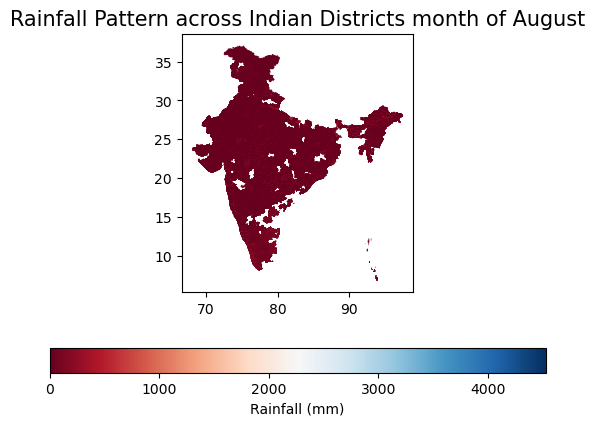

In [27]:
india_geo = gpd.read_file('INDIA_DISTRICTS.geojson')

# Load the rainfall dataset
rainfall_data = pd.read_excel("Geospatial Data Analysis -Indian Rainfall Dataset District.xlsx")

rainfall_data['total_rainfall'] = rainfall_data.loc[:, '1st':'31st'].sum(axis=1)

# Merge the rainfall data with the geospatial data
india_rainfall_geo = india_geo.merge(rainfall_data, how='left', left_on='dtname', right_on='district')

# Plot the geospatial data with rainfall information
plt.figure(figsize=(10, 10))

india_rainfall_geo.plot(column='total_rainfall', legend=True, cmap='RdBu', legend_kwds={'label': "Rainfall (mm)", 'orientation': "horizontal"})



# Add title and display the map
plt.title('Rainfall Pattern across Indian Districts month of August', fontsize=15)
plt.show()

### The analysis revealed distinct rainfall patterns and trends across different regions in India for August 2023. Machine learning models demonstrated varying performance, with Random Forest achieving the lowest RMSE. Future work could include expanding the dataset and exploring more advanced models to enhance predictive accuracy.